# Дискретная случайная величина

In [116]:
import numpy as np

X = np.array([ -3,  -2,  -1,   0,   1,   2,   3,   4,   5])
p = np.array([.05, .06, .13, .24, .06, .15, .14, .08, .09])

# Выборка

Для того, чтобы статистически оценивать математическое ожидание выборки, и другие характеристики, сгенерируем выборку по значениями `X` и `p`. 

In [117]:
sample_discrete = np.random.choice(X, 100000, p=p)

# Математическое ожидание

Вычислим математическое ожидание дискретной случайной величины, определенной массивами `X` и `p`

In [118]:
def EV(a, p):
    """Математическое ожидание"""
    return sum(a*p)

ev = EV(X, p)
print(ev)

1.15


## Статистическая оценка

Математическое ожидание выборки можно оценить как среднее арифметическое от всех образцов выборки (*sample mean*):

$$
\overline x = \frac{1}{n} \sum_{i=1}^n x_i 
$$

Вычислить среднее значение массива Numpy можно методом `mean()`.

In [119]:
sample_discrete = np.random.choice(X, 100000, p=p)
print(len(sample_discrete))     # размер выборки
print(sample_discrete[:16])     # первые 16 значений
print(sample_discrete.mean())   # среднее значение

100000
[ 3 -2 -2  2  4  0  1  0  0 -1  0  0  5 -3 -1  0]
1.15592


# Дисперсия

In [120]:
def var(a, p):
    ev = EV(a, p)
    variance = 0
    for i in range(len(a)):
        variance += ((a[i] - ev) ** 2) * p[i]
    return variance

print(var(X, p))

4.947500000000001


## Выборочная дисперсия (статистическая оценка)

In [121]:
def get_var(sample):
    ev = sample.mean()
    variance = 0
    for s in sample:
        variance += (s - ev) ** 2

    return variance / len(sample)

print(get_var(sample_discrete))

4.941108953601593


Можно воспользоваться функцией `var()` из библиотеки NumPy. Также можно вызвать одноименный метод у массива NumPy:

In [122]:
print(sample_discrete.var())

4.941108953599999


# Стандартное отклонение

Для того, чтобы оценить стандартное отклонение, можно вычислить оценку дисперсии и взять корень. Также можно воспользоваться функцией или методом `std()`:

In [123]:
np.std(sample_discrete)     # функция
sample_discrete.std()       # метод

np.float64(2.2228605339966787)

# Мода

Создадим функцию, которая возвращает словарь, ключами которого будут величины в выборке (`sample`), а по ключу будет количество появления этой величины в выборке:

In [128]:
def get_frequencies_dict(sample):
	dictionary = dict()
	for n in sample_discrete:
		if n in dictionary:
			dictionary[n] += 1
		else:
			dictionary[n] = 1
	return dictionary

get_frequencies_dict(sample_discrete)

{np.int64(3): 14106,
 np.int64(-2): 5872,
 np.int64(2): 15076,
 np.int64(4): 7996,
 np.int64(0): 23938,
 np.int64(1): 5921,
 np.int64(-1): 13097,
 np.int64(5): 9005,
 np.int64(-3): 4989}

Для того, чтобы найти ключ, которому соответствует максимальное значение, можно воспользоваться функцией высшего порядка `max()`. Первым аргументом передается словарь `dictionary`, а вторым (`key`) – экземпляр метода объекта `dictionary.get`, который возвращает значение по ключу. Функция `max()` вернет ключ словарь, для которого метод `dictionary.get` вернет наибольшее значение:

In [131]:
dictionary = get_frequencies_dict(sample_discrete)
print(max(dictionary, key=dictionary.get))

0


## Альтернативный способ

Для того, чтобы найти величину, которая чаще остальных появлялась в выборке, конвертируем ключи и значения словаря в массивы NumPy, используя функцию `fromiter()`,  Далее найдем индекс максимального значения в массиве при помощи функции `argmax()`. По этому индексу в массиве ключей получим величину, которая чаще всего появлялась в выборке, т.е. моду.

In [132]:
dictionary = get_frequencies_dict(sample_discrete)
frequencies = np.fromiter(dictionary.values(), dtype=int)
values = np.fromiter(dictionary.keys(), dtype=int)
index = np.argmax(frequencies)
print(values[index])

0


Убедимся, что распределение выборки по частотам соответствует заданному выше распределению вероятностей случайной величины, по которому и генерировалась эта выборка:

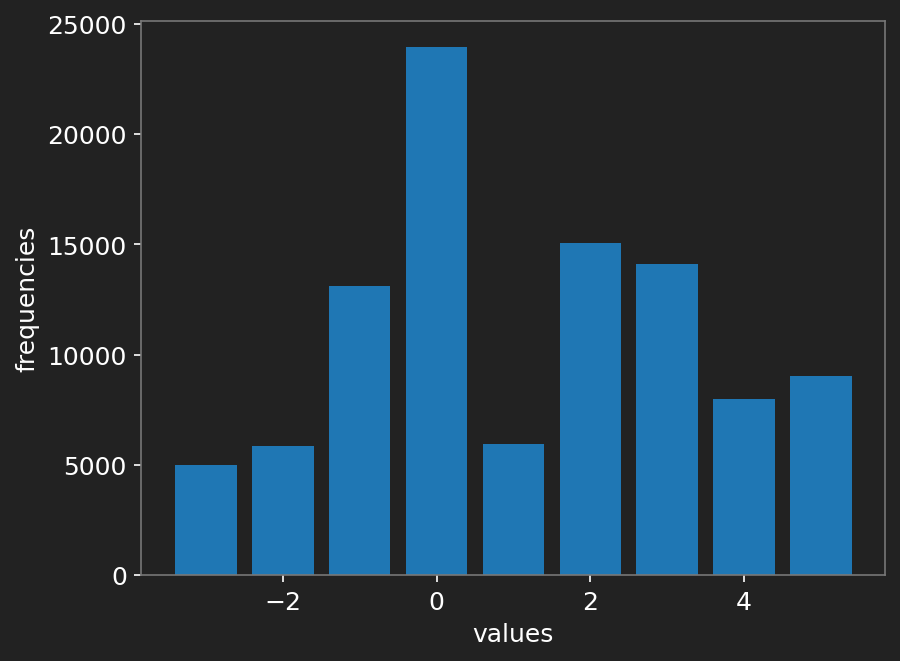

In [134]:
import matplotlib.pyplot as plt

plt.style.use("ordevoir-dark")
plt.bar(values, frequencies)
plt.xlabel('values')
plt.ylabel('frequencies')
plt.show()

# Медиана

Для вычисления медианы можно воспользоваться функцией `np.median()`:

In [ ]:
print(np.median(sample_discrete))

Или написать и собственную функцию

In [135]:
def get_median(sample):
   ordered = np.sort(sample, kind='mergesort')
   n = len(ordered)
   if n % 2 == 0:
       median = ordered[int(n/2)]
   else:
       median = ordered[int(np.ceil(n/2))]
   return median

print(get_median(sample_discrete))

1
